# Análise de dados com Python e Pandas
## Aula 4: Trabalhando com Datas

In [ ]:
# Importa a biblioteca Pandas
import pandas as pd

In [ ]:
# Lê os arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
# Concatena todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
# Exibe as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# Exibe as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# Verifica os tipos de dados do DataFrame
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Altera o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

### Tratando valores faltantes

In [ ]:
# Consulta linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Substitui os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [ ]:
# Exibe uma umostra dos dados
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
20,Fortaleza,2019-01-01,39.68,1003,2
9,Aracaju,2019-01-01,149.36,1523,3
68,Salvador,2019-01-01,162.35,1037,3
139,Natal,2019-01-02,169.01,1036,1
97,Aracaju,2018-01-01,32.69,1521,5
220,Salvador,2019-01-02,42.71,1035,1
198,Natal,2019-01-02,13.65,1037,3
213,Salvador,2019-01-02,42.12,1035,1
131,Natal,2019-01-02,63.48,1037,3
225,Natal,2019-01-02,36.23,1035,1


In [ ]:
# Substitui os valores nulos por 0
df['Vendas'].fillna(0, inplace=True)

In [ ]:
# Remove as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
# Remove as linhas com valores nulos com base em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [ ]:
# Remove as linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

### Criando novas colunas

In [ ]:
# Cria a coluna Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita/Venda"] = df["Receita"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
# Retorna a maior receita
df["Receita"].max()

3544.0

In [ ]:
# Retorna a menor receita
df["Receita"].min()

3.34

In [ ]:
# Retorna as 'n' maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
# Retorna as 'n' menores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
# Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Exibe o conjunto de dados ordenado pela receita
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


### Trabalhando com datas

In [ ]:
# Transforma a coluna data em tipo inteiro
df['Data'] = df['Data'].astype('int64')

In [ ]:
# Verifica o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data               int64
Vendas           float64
LojaID            object
Qtde               int64
Receita          float64
Receita/Venda    float64
dtype: object

In [ ]:
# Transforma a coluna Data em DateTime
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
# Verifica o tipo de dado de cada coluna
df.dtypes

Cidade                   object
Data             datetime64[ns]
Vendas                  float64
LojaID                   object
Qtde                      int64
Receita                 float64
Receita/Venda           float64
dtype: object

In [ ]:
# Agrupa por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Cria uma nova coluna Ano
df['Ano_Venda'] = df['Data'].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda
32,Salvador,2019-01-01,151.27,1035,1,151.27,1.0,2019
189,Salvador,2019-01-02,139.73,1037,2,279.46,2.0,2019
218,Natal,2019-01-02,189.12,1036,3,567.36,3.0,2019
223,Natal,2019-01-02,40.51,1037,2,81.02,2.0,2019
88,Natal,2019-01-02,31.20,1036,1,31.20,1.0,2019


In [ ]:
# Extrai o dia e o mês
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda
37,Recife,2019-01-01,136.36,980,7,954.52,7.0,2019,1,1
41,Natal,2018-05-20,835.00,852,4,3340.00,4.0,2018,5,20
70,Aracaju,2018-01-01,8.44,1523,9,75.96,9.0,2018,1,1
205,Salvador,2019-01-02,196.09,1037,1,196.09,1.0,2019,1,2
52,Salvador,2019-01-01,43.77,1036,2,87.54,2.0,2019,1,1


In [ ]:
# Retorna a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Calcula a diferença de dias
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
89,Aracaju,2018-01-01,10.15,1523,7,71.05,7.0,2018,1,1,0 days
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,3,367 days
189,Natal,2019-01-02,139.73,1037,2,279.46,2.0,2019,1,2,366 days
45,Natal,2019-03-11,431.00,852,3,1293.00,3.0,2019,3,11,434 days
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,4.0,2019,2,13,408 days


In [ ]:
# Cria a coluna de trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
167,Natal,2019-01-02,36.42,1037,1,36.42,1.0,2019,1,2,366 days,1
42,Fortaleza,2019-01-01,38.71,1004,5,193.55,5.0,2019,1,1,365 days,1
129,Aracaju,2018-01-01,13.70,1522,6,82.20,6.0,2018,1,1,0 days,1
112,Aracaju,2018-01-01,4.52,1522,8,36.16,8.0,2018,1,1,0 days,1
49,Aracaju,2018-01-01,53.74,1522,3,161.22,3.0,2018,1,1,0 days,1


In [ ]:
# Filtra as vendas de 2019 do mês de Março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
139,Recife,2019-03-02,141.16,980,7,988.12,7.0,2019,3,2,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days,1
130,Salvador,2019-03-02,59.78,1036,1,59.78,1.0,2019,3,2,425 days,1
134,Recife,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
46,Natal,2019-03-26,753.00,853,2,1506.00,2.0,2019,3,26,449 days,1
66,Natal,2019-03-24,559.00,853,2,1118.00,2.0,2019,3,24,447 days,1
127,Recife,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
116,Salvador,2019-03-02,41.78,1034,3,125.34,3.0,2019,3,2,425 days,1


### Visualização de Dados

In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

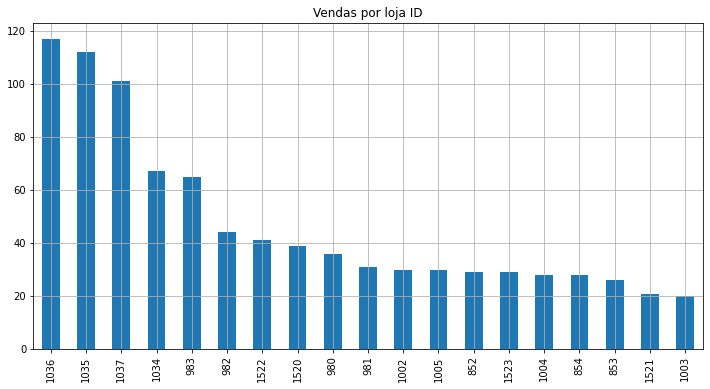

In [ ]:
# Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar(title="Vendas por loja ID", figsize=(12,6)).grid();

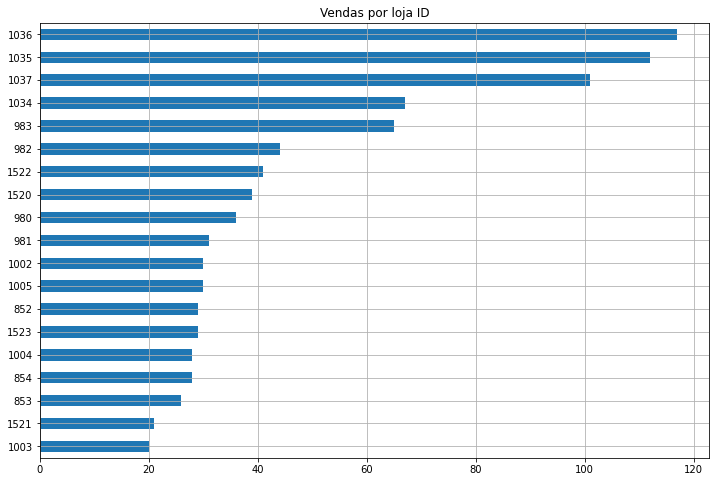

In [ ]:
# Gráfico de barras
df["LojaID"].value_counts(ascending=True).plot.barh(title="Vendas por loja ID", figsize=(12,8)).grid();

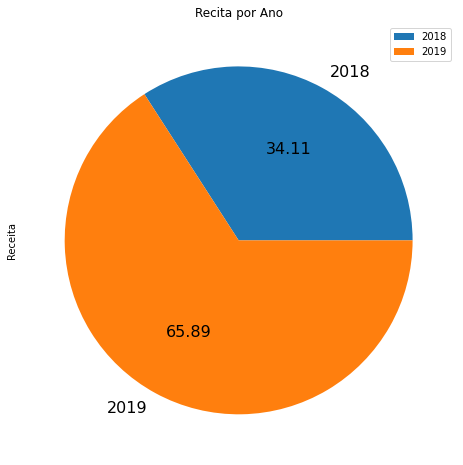

In [ ]:
# Gráfico de Pizza
df.groupby(df["Data"].dt.year)[["Receita"]].sum().reset_index().set_index('Data') \
.plot.pie(y="Receita", title="Recita por Ano", figsize=(8,8),
          legend=True, autopct='%.2f', fontsize=16);

In [ ]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

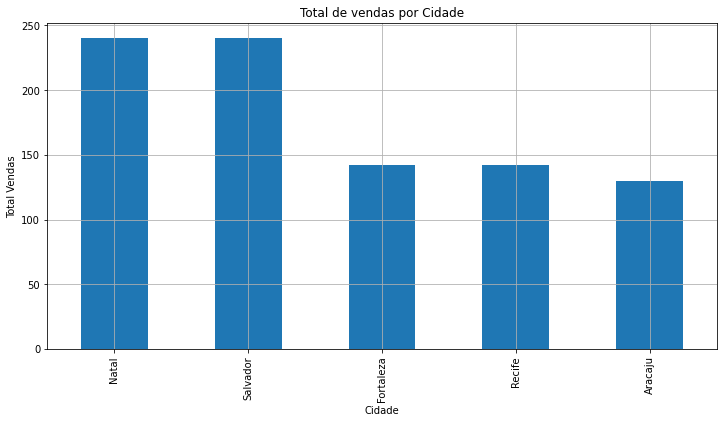

In [ ]:
# Adiciona um Título e altera o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", figsize=(12,6))
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")
plt.grid()
plt.show()

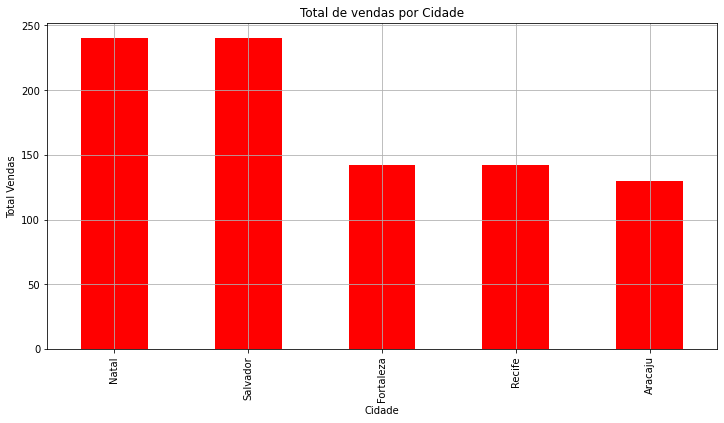

In [ ]:
# Altera a cor das barras
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", figsize=(12,6), color='red')
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")
plt.grid()
plt.show()

In [ ]:
# Altera o estilo de cores e gráficos
plt.style.use('ggplot')

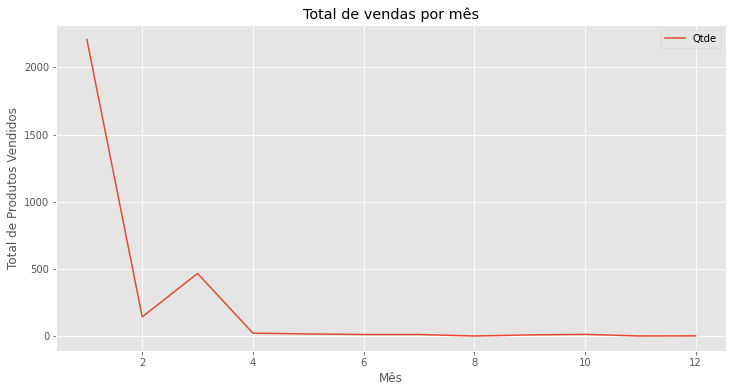

In [ ]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total de vendas por mês", figsize=(12,6))
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()
plt.show()

In [ ]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
df_2019 = df.query("Ano_Venda == 2019")
df_2019.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,6.0,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1.0,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,6.0,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,4.0,2019,1,1,365 days,1


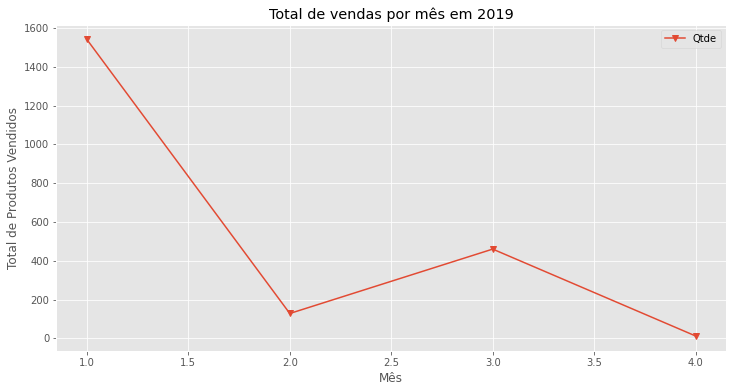

In [ ]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(title="Total de vendas por mês em 2019", figsize=(12,6), marker="v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()
plt.show()

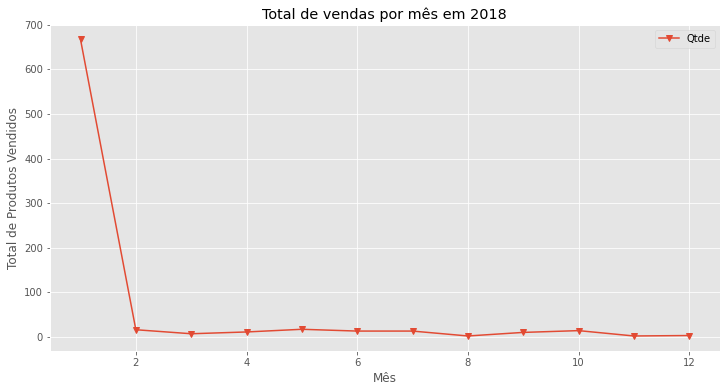

In [ ]:
df_2018 = df.query("Ano_Venda == 2018")
df_2018.groupby(df_2018["Mes_Venda"])["Qtde"].sum().plot(title="Total de vendas por mês em 2018",figsize=(12,6), marker="v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()
plt.show()

No handles with labels found to put in legend.


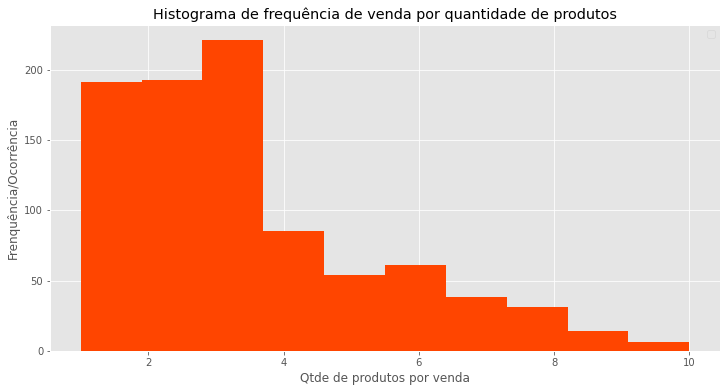

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.hist(df["Qtde"], color="orangered")
ax.set(xlabel="Qtde de produtos por venda",
       ylabel="Frenquência/Ocorrência",
       title="Histograma de frequência de venda por quantidade de produtos")
plt.legend()
plt.show()

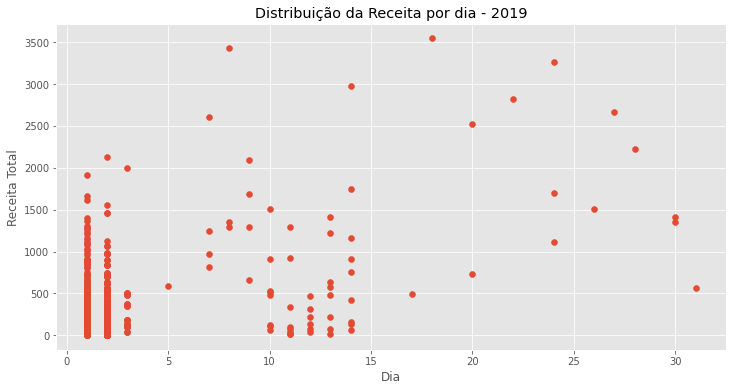

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(df_2019["Dia_Venda"], y = df_2019["Receita"])
ax.set(xlabel="Dia", ylabel="Receita Total", title = "Distribuição da Receita por dia - 2019");

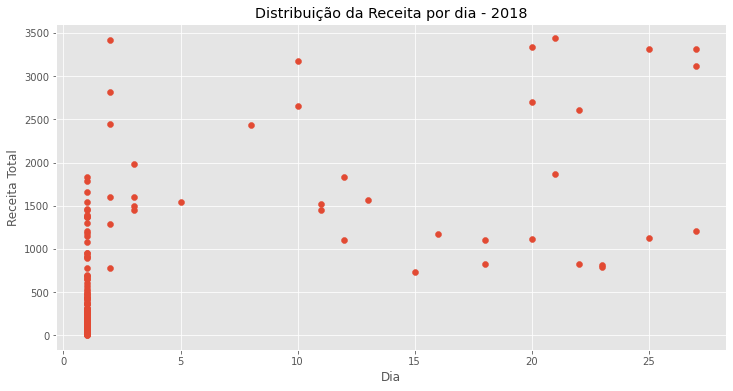

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(df_2018["Dia_Venda"], y = df_2018["Receita"])
ax.set(xlabel="Dia", ylabel="Receita Total", title = "Distribuição da Receita por dia - 2018");

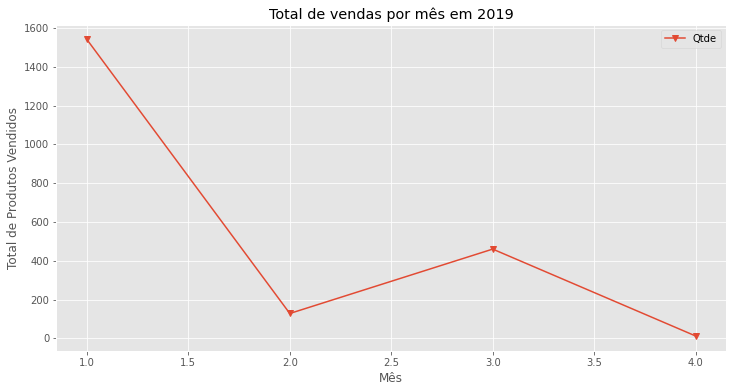

In [ ]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(title="Total de vendas por mês em 2019", figsize=(12,6), marker="v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()
plt.savefig("grafico_QTD-MES.png")

FIM